In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

# Описание столбцов

- train.csv - персональные данные пассажиров
    * PassengerId - уникальный айди каждого пассажира в формате gggg_pp, где gggg - обозначает группу пассажира, pp - номер внутри группы.
    * HomePlanet - планета, с которой пассажир вылетел, обычно планета постоянного проживания.
    * CryoSleep - указывает, согласился ли пассажир на анабиоз на время путешествия. Пассажиры, находящиеся в криосне, находятся в своих каютах.
    * Cabin - номер каюты, в которой находится пассажир. Имеет вид deck/num/side, где side может быть P (левый борт) или S (правый борт).
    * Destination - планета, на которую пассажир высадится.
    * Age - возраст пассажира.
    * VIP - оплатил ли пассажир специальное VIP-обслуживание во время путешествия.
    * RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - сумма, оплаченная пассажиром за каждый из многочисленных роскошных удобств космического корабля «Титаник».
    * Name - имя и фамилия пассажира.
    * Transported - был ли пассажир перенесен в другое измерение. Это и есть цель, столбец, который вы пытаетесь предсказать.
- test.csv — Личные данные оставшейся трети (~4300) пассажиров, которые будут использованы в качестве тестовых данных. Ваша задача — предсказать значение «Перевезено» для пассажиров из этого набора.
- sample_submission.csv - файл отправки в правильном формате.
    * PassengerId — идентификатор каждого пассажира в тестовом наборе.
    * Transfered — целевой объект. Для каждого пассажира предскажите значение True или False.

In [3]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
# Check for missing values
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
corr_matrix = train.corr(numeric_only=True)
corr_matrix

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<Axes: >

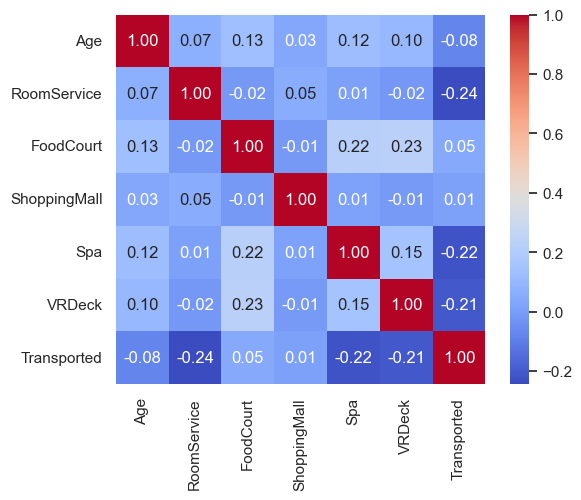

In [9]:
# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')

In [10]:

transported = train[train['Transported'] == True]
not_transported = train[train['Transported'] == False]

print(f"Transported: {len(transported)} ({len(transported)/len(train)*100:.2f}%)")
print(f"Not Transported: {len(not_transported)} ({len(not_transported)/len(train)*100:.2f}%)")

Transported: 4378 (50.36%)
Not Transported: 4315 (49.64%)


<Axes: title={'center': 'HomePlanet Distribution'}, xlabel='HomePlanet'>

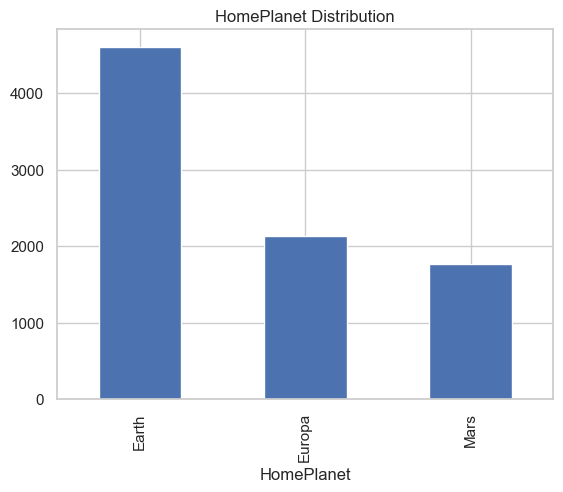

In [11]:
train['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet Distribution')

In [12]:
earth = train[train['HomePlanet'] == 'Earth']
europa = train[train['HomePlanet'] == 'Europa']
mars = train[train['HomePlanet'] == 'Mars']

print(f"Earth: {len(earth)} ({len(earth)/len(train)*100:.2f}%)")
print(f"Europa: {len(europa)} ({len(europa)/len(train)*100:.2f}%)")
print(f"Mars: {len(mars)} ({len(mars)/len(train)*100:.2f}%)")

Earth: 4602 (52.94%)
Europa: 2131 (24.51%)
Mars: 1759 (20.23%)


In [13]:
train['HomePlanet'][train['HomePlanet'].isnull()] = 'Earth'

C:\Users\ysnxlmted\AppData\Local\Temp\ipykernel_14904\252261778.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['HomePlanet'][train['HomePlanet'].isnull()] = 'Earth'
C:\Users\ysnxlmted\AppData\Local\Temp\ipykernel_14904\252261778.p

### HomePlanet vs. Transported

In [14]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [15]:
train.groupby('HomePlanet')['Transported'].value_counts()

HomePlanet  Transported
Earth       False          2749
            True           2054
Europa      True           1404
            False           727
Mars        True            920
            False           839
Name: count, dtype: int64

In [16]:
train[['HomePlanet', 'Transported']].groupby('HomePlanet').mean()

,Transported
HomePlanet,
Earth,0.427649
Europa,0.658846
Mars,0.523024


<Axes: title={'center': 'Transported Rate by HomePlanet'}, xlabel='HomePlanet'>

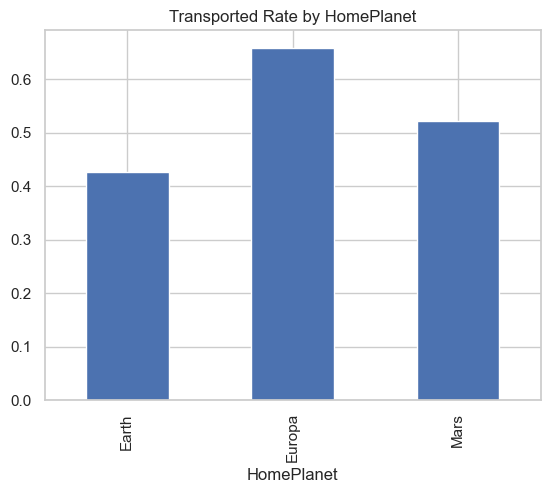

In [17]:
train.groupby('HomePlanet')['Transported'].mean().plot(kind='bar', title='Transported Rate by HomePlanet')

### CryoSleep vs. Transported

In [18]:
train['CryoSleep'].isna().sum()

np.int64(217)

<Axes: title={'center': 'CryoSleep Distribution'}, xlabel='CryoSleep'>

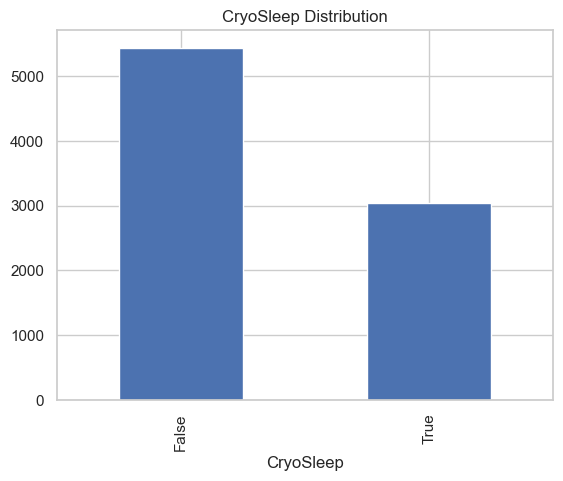

In [19]:
train['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep Distribution')

In [20]:
train[train['CryoSleep'].isnull()]['CryoSleep'] = False
train['CryoSleep'].value_counts()

C:\Users\ysnxlmted\AppData\Local\Temp\ipykernel_14904\1673802074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[train['CryoSleep'].isnull()]['CryoSleep'] = False


CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [21]:
train[['CryoSleep', 'Transported']].groupby('CryoSleep').mean()

,Transported
CryoSleep,
False,0.328921
True,0.817583


<Axes: xlabel='CryoSleep', ylabel='Transported'>

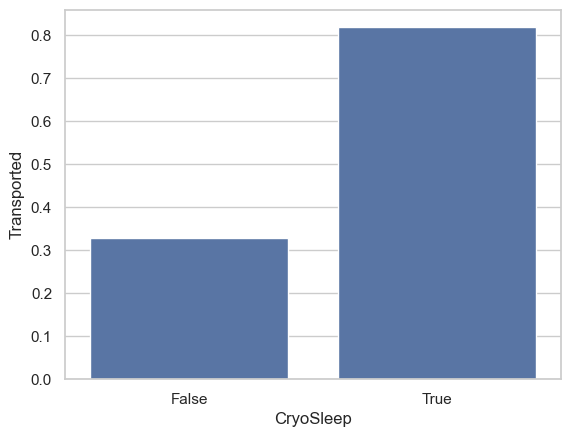

In [22]:
sns.barplot(x='CryoSleep', y='Transported', data=train, errorbar=None)

In [23]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Cabin decomposition

распаковываю столбец cabin

In [24]:
train['Deck'] = train['Cabin'].apply(lambda x: str(x).split('/')[0] if pd.notna(x) else np.nan)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F


In [25]:
train['Side'] = train['Cabin'].apply(lambda x: str(x).split('/')[2] if pd.notna(x) else np.nan)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


### Deck vs. Transported

In [26]:
train[['Deck', 'Transported']].groupby('Deck').mean()

,Transported
Deck,
A,0.496094
B,0.734275
C,0.680054
D,0.433054
E,0.357306
F,0.439871
G,0.516217
T,0.200000


<Axes: xlabel='Deck', ylabel='Transported'>

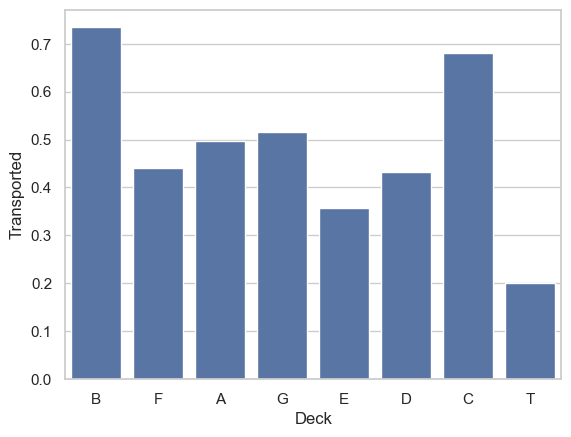

In [27]:
sns.barplot(x='Deck', y='Transported', data=train, errorbar=None)

### Side vs. Transported

In [28]:
train[['Side', 'Transported']].groupby('Side').mean()

,Transported
Side,
P,0.451260
S,0.555037


### Side & Deck vs. Pransported

In [ ]:
sns.catplot(x='Deck', y='Transported', hue='Side', data=train, kind='point', aspect=2)

ValueError: Could not interpret value `Side` for `hue`. An entry with this name does not appear in `data`.

side особо не влияет

---

In [30]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


### Destination vs. Transported

In [31]:
train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [32]:
train['Destination'].isna().sum()

np.int64(182)

In [33]:
train['Destination'][train['Destination'].isna()] = 'TRAPPIST-1e'
train['Destination'].value_counts()

C:\Users\ysnxlmted\AppData\Local\Temp\ipykernel_14904\222031709.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Destination'][train['Destination'].isna()] = 'TRAPPIST-1e'
C:\Users\ysnxlmted\AppData\Local\Temp\ipykernel_14904\22203

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [34]:
train[['Destination', 'Transported']].groupby('Destination').mean()

,Transported
Destination,
55 Cancri e,0.610000
PSO J318.5-22,0.503769
TRAPPIST-1e,0.472199


<Axes: xlabel='Destination', ylabel='Transported'>

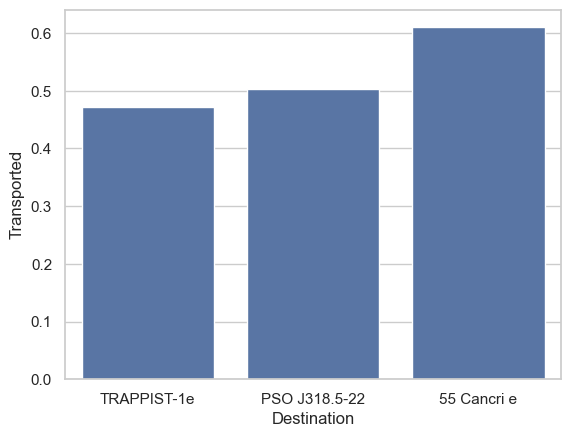

In [35]:
sns.barplot(x='Destination', y='Transported', data=train, errorbar=None)

### Age vs. Transported

<Axes: xlabel='Age'>

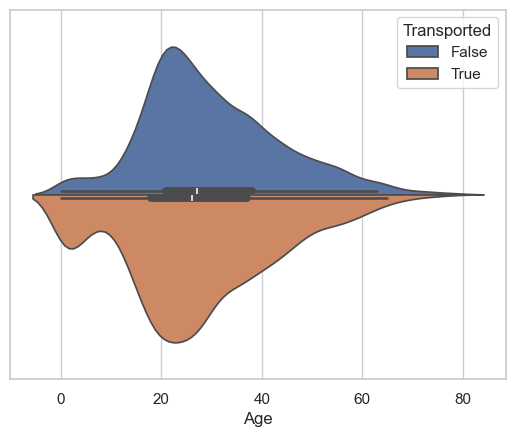

In [36]:
sns.violinplot(x='Age', hue='Transported', data=train, split=True)

<Axes: xlabel='CryoSleep', ylabel='Age'>

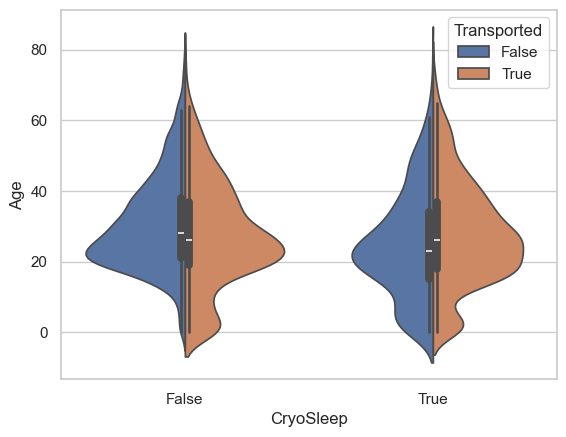

In [37]:
sns.violinplot(x='CryoSleep', y='Age', hue='Transported', data=train, split=True)

<Axes: xlabel='Deck', ylabel='Age'>

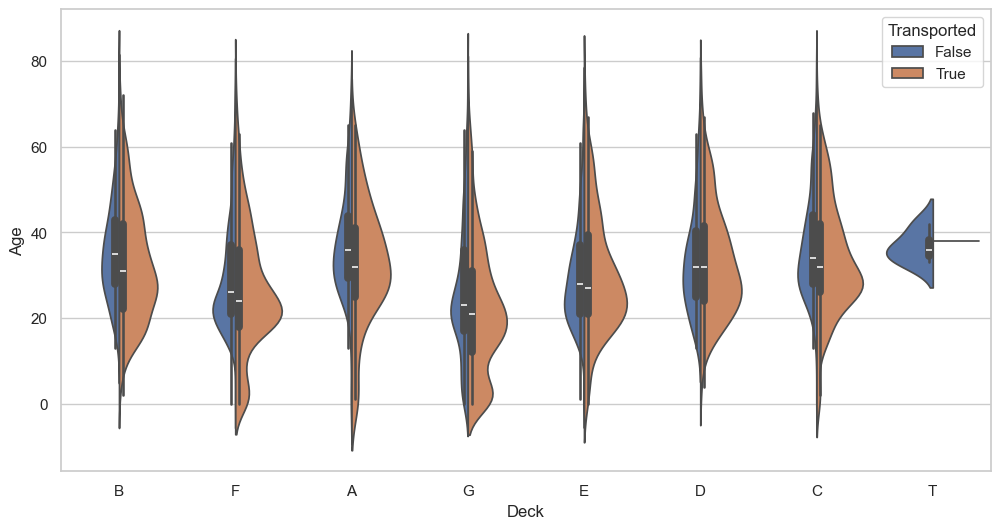

In [38]:
fig = plt.figure(figsize=(12, 6))
sns.violinplot(x='Deck', y='Age', hue='Transported', data=train, split=True)

<Axes: xlabel='VIP', ylabel='Age'>

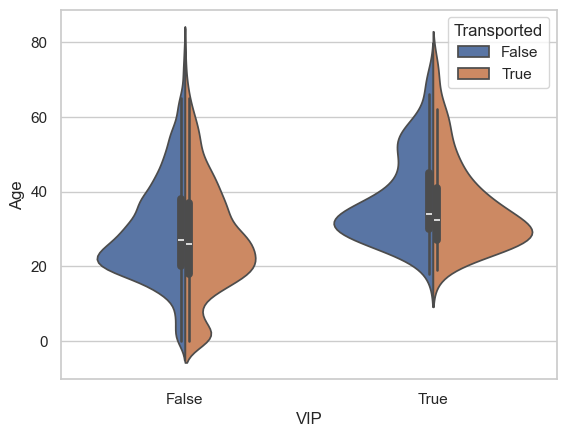

In [39]:
sns.violinplot(x='VIP', y='Age', hue='Transported', data=train, split=True)

Разобью Age по категориям старости

In [40]:

train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4

In [41]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,1.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,3.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,2.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,0.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


<Axes: xlabel='Age', ylabel='Transported'>

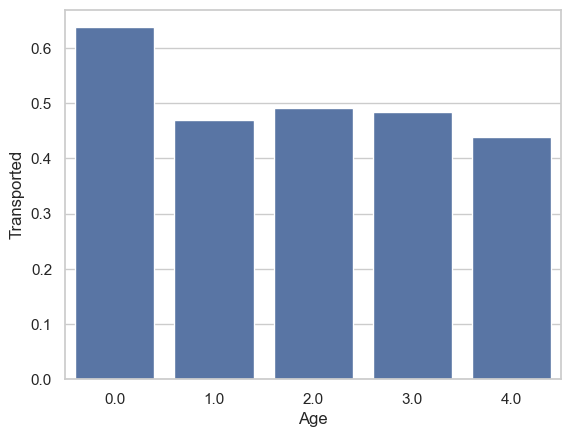

In [42]:
sns.barplot(x='Age', y='Transported', data=train, errorbar=None)

удаляю Side так как ниче интересного извель не вышло

In [43]:
train = train.drop('Side', axis=1)

создаю столбец Paid как сумму столбцов RoomService	FoodCourt	ShoppingMall	Spa	VRDeck

In [44]:
train['Paid'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Paid
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,1.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,3.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,2.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,0.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1091.0


<Axes: xlabel='Paid'>

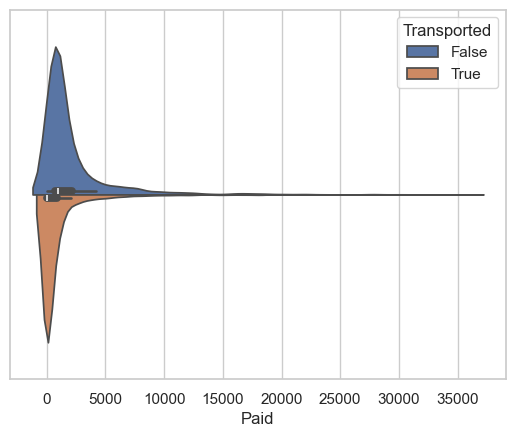

In [45]:
sns.violinplot(x='Paid', hue='Transported', data=train, split=True)

<Axes: >

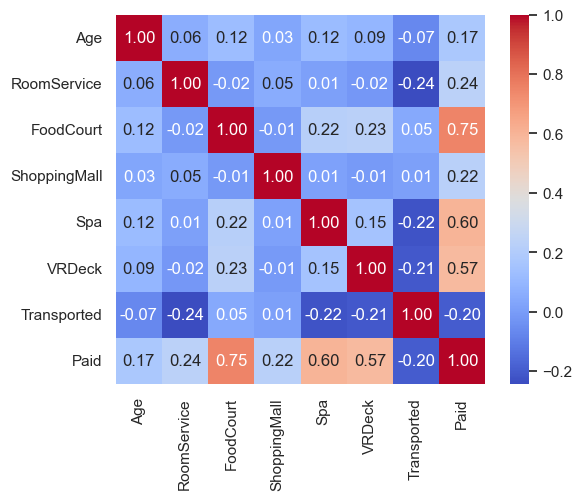

In [46]:
corr_matrix = train.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')

### Достаю фамилии

для подсчета размера семьи

In [47]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Paid
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,1.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,3.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,2.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,0.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1091.0


In [48]:
train['Surname'] = train['Name'].apply(lambda x: str(x).split(' ')[-1] if pd.notna(x) else np.nan)
train['Name'] = train['Name'].apply(lambda x: (str(x).split(' ')[0]) if pd.notna(x) else np.nan)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Paid,Surname
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Maham,False,B,0.0,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,1.0,False,109.0,9.0,25.0,549.0,44.0,Juanna,True,F,736.0,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,3.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark,False,A,10383.0,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,2.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam,False,A,5176.0,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,0.0,False,303.0,70.0,151.0,565.0,2.0,Willy,True,F,1091.0,Santantines


In [49]:
train['Surname'].value_counts()

Surname
Casonston     18
Oneiles       16
Domington     15
Litthews      15
Fulloydez     14
              ..
Maglible       1
Valing         1
Curry          1
Halexandez     1
Goods          1
Name: count, Length: 2217, dtype: int64

In [50]:
train['FamilySize'] = train.groupby('Surname')['Surname'].transform('count')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Paid,Surname,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Maham,False,B,0.0,Ofracculy,1.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,1.0,False,109.0,9.0,25.0,549.0,44.0,Juanna,True,F,736.0,Vines,4.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,3.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark,False,A,10383.0,Susent,6.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,2.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam,False,A,5176.0,Susent,6.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,0.0,False,303.0,70.0,151.0,565.0,2.0,Willy,True,F,1091.0,Santantines,6.0


### FamilySize vs. Transported

In [51]:
train[['FamilySize', 'Transported']].groupby('FamilySize').mean()

,Transported
FamilySize,
1.0,0.583770
2.0,0.493750
3.0,0.534364
4.0,0.503906
5.0,0.509375
6.0,0.499037
7.0,0.481393
8.0,0.454044
9.0,0.482540


<Axes: xlabel='FamilySize', ylabel='Transported'>

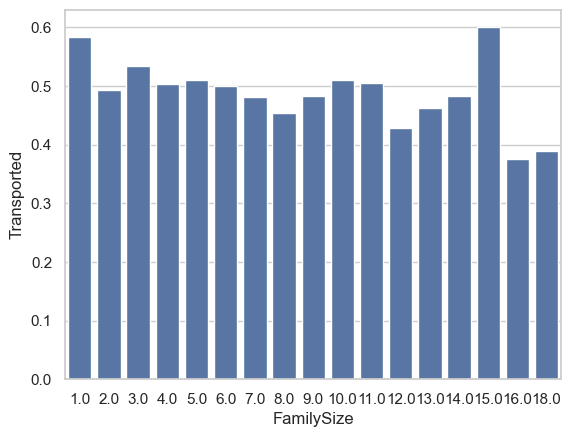

In [52]:
sns.barplot(x='FamilySize', y='Transported', data=train, errorbar=None)

<Axes: >

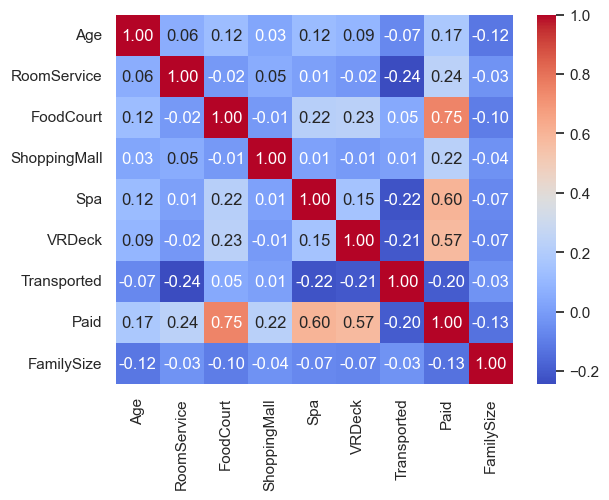

In [53]:
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')